In [1]:
!pip install tensorflow scikit-learn pandas numpy matplotlib seaborn streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 30.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


In [3]:
from google.colab import files
uploaded = files.upload()

data = pd.read_csv(list(uploaded.keys())[0])
data.head()


Saving crop.zip to crop (1).zip


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


Shape: (2200, 8)
Columns: Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')
label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64
Missing Values:
 N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


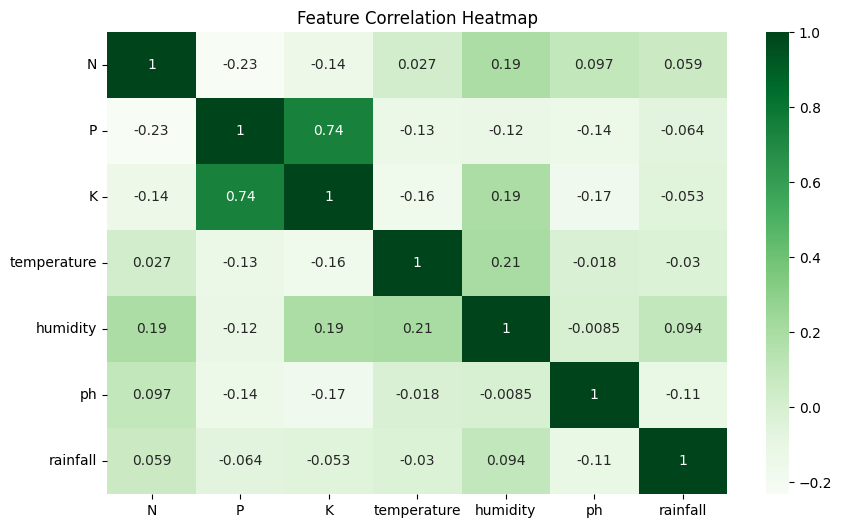

In [5]:
print("Shape:", data.shape)
print("Columns:", data.columns)
print(data['label'].value_counts())
print("Missing Values:\n", data.isnull().sum())

plt.figure(figsize=(10,6))
sns.heatmap(data.drop('label', axis=1).corr(), annot=True, cmap="Greens")
plt.title("Feature Correlation Heatmap")
plt.show()

In [6]:
X = data.drop('label', axis=1)
y = pd.factorize(data['label'])[0]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=30, validation_split=0.2, verbose=1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.1784 - loss: 2.9172 - val_accuracy: 0.5028 - val_loss: 2.2773
Epoch 2/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5403 - loss: 2.0302 - val_accuracy: 0.6989 - val_loss: 1.3129
Epoch 3/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7638 - loss: 1.0906 - val_accuracy: 0.8636 - val_loss: 0.7109
Epoch 4/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8600 - loss: 0.6374 - val_accuracy: 0.8722 - val_loss: 0.4856
Epoch 5/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9011 - loss: 0.4454 - val_accuracy: 0.9148 - val_loss: 0.3460
Epoch 6/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9201 - loss: 0.3392 - val_accuracy: 0.9205 - val_loss: 0.2910
Epoch 7/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9247 - loss: 0.2888 - val_accuracy: 0.9261 - val_loss: 0.2410
Epoch 8/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9376 - loss: 0.2415 - val_accuracy: 0.9318 - val_lo

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
MLP Accuracy: 0.9681818181818181
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        19
           1       1.00      0.95      0.98        21
           2       1.00      1.00      1.00        26
           3       0.91      1.00      0.95        20
           4       1.00      0.91      0.95        23
           5       1.00      0.88      0.93        24
           6       1.00      1.00      1.00        19
           7       1.00      0.95      0.97        20
           8       0.73      1.00      0.85        11
           9       1.00      1.00      1.00        23
          10       1.00      1.00      1.00        21
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00        14
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        17
          15       1.00      1.00      1.00        23
         

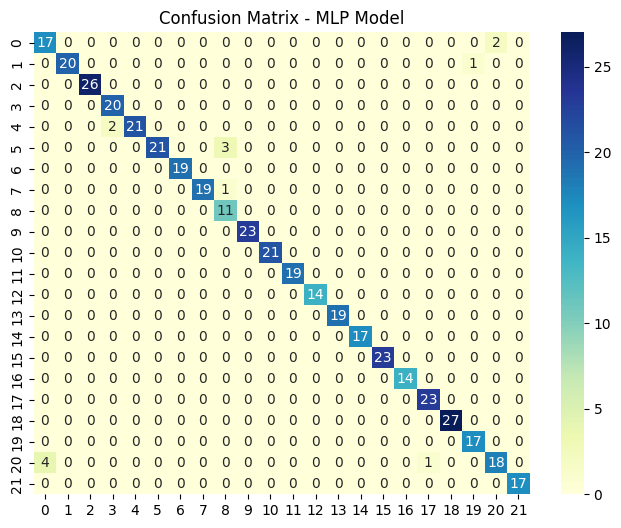

In [10]:
y_pred = np.argmax(model.predict(X_test), axis=1)
print("MLP Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), cmap="YlGnBu", annot=True, fmt="d")
plt.title("Confusion Matrix - MLP Model")
plt.show()


In [11]:
model.save('crop_model.h5')

label_map = dict(enumerate(pd.factorize(data['label'])[1]))
with open('label_map.pkl', 'wb') as f:
    pickle.dump(label_map, f)

print("✅ MLP model & label map saved.")


✅ MLP model & label map saved.


In [12]:
sample = np.array([[90, 42, 43, 20.879744, 82.002744, 6.502985, 202.935536]])
sample_scaled = scaler.transform(sample)

pred = np.argmax(model.predict(sample_scaled))
print("Predicted crop:", label_map[pred])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted crop: rice


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [13]:
from google.colab import files
files.download('crop_model.h5')
files.download('label_map.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
time_steps = 12
num_features = X.shape[1]

def create_time_series(X):
    seqs = []
    for _, row in pd.DataFrame(X).iterrows():
        base = row.values
        seq = [base + np.random.normal(0, 0.05, num_features) for _ in range(time_steps)]
        seqs.append(seq)
    return np.array(seqs)

In [15]:
X_seq = create_time_series(X)
y_seq = y

X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

In [16]:
scaler_seq = StandardScaler()
X_train_seq = scaler_seq.fit_transform(X_train_seq.reshape(-1, num_features)).reshape(X_train_seq.shape)
X_test_seq = scaler_seq.transform(X_test_seq.reshape(-1, num_features)).reshape(X_test_seq.shape)


In [17]:

lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, return_sequences=True, input_shape=(time_steps, num_features)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(y_seq)), activation='softmax')
])

lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_lstm = lstm_model.fit(X_train_seq, y_train_seq, epochs=25, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/25


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.2578 - loss: 2.7328 - val_accuracy: 0.6023 - val_loss: 1.4327
Epoch 2/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7251 - loss: 1.0793 - val_accuracy: 0.8807 - val_loss: 0.4477
Epoch 3/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9161 - loss: 0.3446 - val_accuracy: 0.9375 - val_loss: 0.2645
Epoch 4/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9300 - loss: 0.2124 - val_accuracy: 0.9460 - val_loss: 0.1699
Epoch 5/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9568 - loss: 0.1494 - val_accuracy: 0.9403 - val_loss: 0.1824
Epoch 6/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9691 - loss: 0.1095 - val_accuracy: 0.9460 - val_loss: 0.1565
Epoch 7/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9733 - loss: 0.0926 - val_accuracy: 0.9460 - val_loss: 0.1248
Epoch 8/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9722 - loss: 0.0695 - val_accuracy: 0.9716 - val_loss: 0.

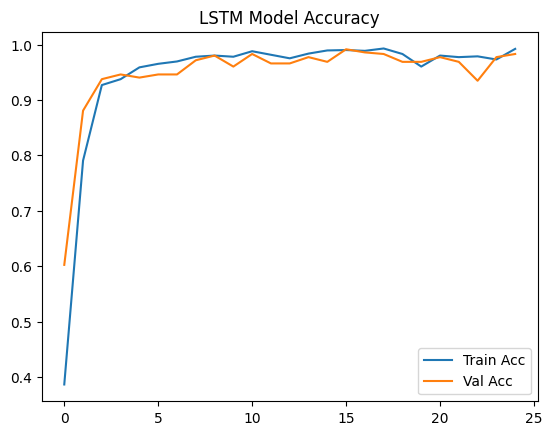

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
LSTM Accuracy: 0.9727272727272728
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        19
           1       1.00      0.95      0.98        21
           2       1.00      1.00      1.00        26
           3       0.91      1.00      0.95        20
           4       1.00      0.91      0.95        23
           5       1.00      0.92      0.96        24
           6       1.00      1.00      1.00        19
           7       1.00      0.95      0.97        20
           8       0.79      1.00      0.88        11
           9       1.00      1.00      1.00        23
          10       1.00      1.00      1.00        21
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00        14
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        17
          15       1.00      1.00      1.00        23
       

In [18]:
plt.plot(history_lstm.history['accuracy'], label='Train Acc')
plt.plot(history_lstm.history['val_accuracy'], label='Val Acc')
plt.title("LSTM Model Accuracy"); plt.legend(); plt.show()

y_pred_seq = np.argmax(lstm_model.predict(X_test_seq), axis=1)
print("LSTM Accuracy:", accuracy_score(y_test_seq, y_pred_seq))
print(classification_report(y_test_seq, y_pred_seq))


In [19]:
lstm_model.save('crop_lstm_model.h5')
print("✅ LSTM model saved successfully!")


✅ LSTM model saved successfully!


In [20]:
sample = np.array([[90, 42, 43, 20.879744, 82.002744, 6.502985, 202.935536]])
seq_sample = [sample + np.random.normal(0, 0.05, sample.shape) for _ in range(12)]
seq_sample = np.array(seq_sample).reshape(1, 12, num_features)
seq_sample = scaler_seq.transform(seq_sample.reshape(-1, num_features)).reshape(1, 12, num_features)

pred = np.argmax(lstm_model.predict(seq_sample))
print("Predicted Crop (Seasonal):", label_map[pred])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted Crop (Seasonal): rice


In [21]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import numpy as np
import pickle

st.title("🌾 Crop–Soil Recommender App")
st.write("Predict the most suitable crop based on soil and environmental parameters.")

# Load model & label map
model = tf.keras.models.load_model('crop_model.h5')
with open('label_map.pkl', 'rb') as f:
    label_map = pickle.load(f)

# Input fields
N = st.number_input("Nitrogen (N)", 0, 200, 50)
P = st.number_input("Phosphorus (P)", 0, 200, 50)
K = st.number_input("Potassium (K)", 0, 200, 50)
temperature = st.number_input("Temperature (°C)", 0.0, 50.0, 25.0)
humidity = st.number_input("Humidity (%)", 0.0, 100.0, 50.0)
ph = st.number_input("Soil pH", 0.0, 14.0, 6.5)
rainfall = st.number_input("Rainfall (mm)", 0.0, 300.0, 100.0)

if st.button("Predict Crop"):
    sample = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    pred = np.argmax(model.predict(sample))
    st.success(f"🌱 Recommended Crop: **{label_map[pred]}**")


Writing app.py
